<a href="https://colab.research.google.com/github/SarahSouzaPontes/IBGEprojecao2018.2022.06/blob/main/IBGE_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
Instalação das bibliotecas importantes
'''
!pip install pandas -q
!pip install numpy -q
!pip uninstall pandas-profiling -y -q
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     |████████████████████████████████| 21.8 MB 13.5 MB/s 
     |████████████████████████████████| 11.1 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 58.3 MB/s 
     |████████████████████████████████| 102 kB 62.0 MB/s 
     |████████████████████████████████| 690 kB 49.5 MB/s 
     |████████████████████████████████| 4.7 MB 45.6 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 57.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport


In [4]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
'''
Carregando os arquivos .csv como panda dataframe
'''
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/projecao_ibge_2018.csv", sep = ";", header = 0)

In [6]:
dataset

,Unnamed: 0,Pais,Nome_Regiao,Codigo_Regiao,Nome_UF,Codigo_UF,Sigla_UF,Ano,Populacao_Total,Populacao_Homens,...,Rz_Dep_Jovens,Rz_Dep_Idosos,Rz_Dep_Total,Indice_Envelhecimento,Proporcao_0a14anos,Proporcao_15a64anos,Proporcao_65anosoumais,Proporcao_15a59anos,Proporcao_60anosoumais,Idade_Mediana
0,1,Brasil,Todas,0,Todas,0,BR,2010,194890682,95513298,...,"36,32","10,77","47,09","29,55","24,7",68,"7,3","64,6","10,71","29,2"
1,2,Brasil,Todas,0,Todas,0,BR,2011,196603732,96322635,...,"35,37","10,99","46,36","30,99","24,2","68,3","7,5","64,84",11,"29,63"
2,3,Brasil,Todas,0,Todas,0,BR,2012,198314934,97132054,...,"34,45","11,24","45,68","32,63","23,6","68,6","7,7","65,05","11,3","30,06"
3,4,Brasil,Todas,0,Todas,0,BR,2013,200004188,97931331,...,"33,56","11,51","45,07","34,2","23,1","68,9","7,9","65,24","11,62","30,49"
4,5,Brasil,Todas,0,Todas,0,BR,2014,201717541,98744098,...,"32,78","11,81","44,59","36,12","22,7","69,2","8,2","65,37","11,96","30,92"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,1679,Brasil,Centro-Oeste,5,Distrito Federal,53,DF,2056,3798193,1832944,...,"20,76","40,07","60,83","193,02","12,9","62,2","24,9","55,72","31,37","46,34"
1679,1680,Brasil,Centro-Oeste,5,Distrito Federal,53,DF,2057,3797772,1832924,...,"20,71","40,72","61,43","196,88","12,8","61,9","25,2","55,44","31,74","46,49"
1680,1681,Brasil,Centro-Oeste,5,Distrito Federal,53,DF,2058,3796218,1832366,...,"20,65","41,34",62,"200,79","12,7","61,7","25,5","55,16","32,09","46,63"
1681,1682,Brasil,Centro-Oeste,5,Distrito Federal,53,DF,2059,3793533,1831272,...,"20,61","41,96","62,56","203,15","12,7","61,5","25,8","54,88","32,44","46,75"


In [7]:
dataset.shape



(1683, 39)

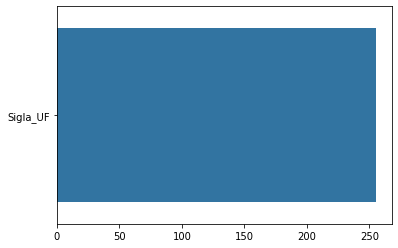

In [8]:

''' Verificando as colunas que mais possuem valores NaN '''
X=dataset.isna().sum().sort_values(ascending=False)
drop_list = []
for i in range(0,(len(X))):
  if (X[i] == 0):
    drop_list.append(X.index[i])
X.drop(labels=drop_list, inplace=True)
sns.barplot(y=X.index,x=X.values,order=X.index)



In [ ]:
#Apagando os NAN


dataset.isnull().values.any()


In [10]:
#Todas variáveis do dataset
list(dataset)



['Unnamed: 0',
 'Pais',
 'Nome_Regiao',
 'Codigo_Regiao',
 'Nome_UF',
 'Codigo_UF',
 'Sigla_UF',
 'Ano',
 'Populacao_Total',
 'Populacao_Homens',
 'Populacao_Mulheres',
 'Nascimentos',
 'Obitos',
 'TBN',
 'TBM',
 'EVN',
 'EVN_Homens',
 'EVN_Mulheres',
 'TMI',
 'TMI_Homens',
 'TMI_Mulheres',
 'TFT',
 'TEF_15_19',
 'TEF_20_24',
 'TEF_25_29',
 'TEF_30_34',
 'TEF_35_39',
 'TEF_40_44',
 'TEF_45_49',
 'Rz_Dep_Jovens',
 'Rz_Dep_Idosos',
 'Rz_Dep_Total',
 'Indice_Envelhecimento',
 'Proporcao_0a14anos',
 'Proporcao_15a64anos',
 'Proporcao_65anosoumais',
 'Proporcao_15a59anos',
 'Proporcao_60anosoumais',
 'Idade_Mediana']

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              1683 non-null   int64 
 1   Pais                    1683 non-null   object
 2   Nome_Regiao             1683 non-null   object
 3   Codigo_Regiao           1683 non-null   int64 
 4   Nome_UF                 1683 non-null   object
 5   Codigo_UF               1683 non-null   int64 
 6   Sigla_UF                1428 non-null   object
 7   Ano                     1683 non-null   int64 
 8   Populacao_Total         1683 non-null   int64 
 9   Populacao_Homens        1683 non-null   int64 
 10  Populacao_Mulheres      1683 non-null   int64 
 11  Nascimentos             1683 non-null   int64 
 12  Obitos                  1683 non-null   int64 
 13  TBN                     1683 non-null   object
 14  TBM                     1683 non-null   object
 15  EVN 

In [12]:


'''
Removendo a coluna com os id's 
'''
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()



,Pais,Nome_Regiao,Codigo_Regiao,Nome_UF,Codigo_UF,Sigla_UF,Ano,Populacao_Total,Populacao_Homens,Populacao_Mulheres,...,Rz_Dep_Jovens,Rz_Dep_Idosos,Rz_Dep_Total,Indice_Envelhecimento,Proporcao_0a14anos,Proporcao_15a64anos,Proporcao_65anosoumais,Proporcao_15a59anos,Proporcao_60anosoumais,Idade_Mediana
0,Brasil,Todas,0,Todas,0,BR,2010,194890682,95513298,99377384,...,"36,32","10,77","47,09","29,55","24,7",68,"7,3","64,6","10,71","29,2"
1,Brasil,Todas,0,Todas,0,BR,2011,196603732,96322635,100281097,...,"35,37","10,99","46,36","30,99","24,2","68,3","7,5","64,84",11,"29,63"
2,Brasil,Todas,0,Todas,0,BR,2012,198314934,97132054,101182880,...,"34,45","11,24","45,68","32,63","23,6","68,6","7,7","65,05","11,3","30,06"
3,Brasil,Todas,0,Todas,0,BR,2013,200004188,97931331,102072857,...,"33,56","11,51","45,07","34,2","23,1","68,9","7,9","65,24","11,62","30,49"
4,Brasil,Todas,0,Todas,0,BR,2014,201717541,98744098,102973443,...,"32,78","11,81","44,59","36,12","22,7","69,2","8,2","65,37","11,96","30,92"


In [13]:
#Características do Nascimento
dataset.Nascimentos.value_counts()


141012    2
26112     2
49418     2
53083     2
56169     2
         ..
113903    1
114639    1
115424    1
116193    1
32984     1
Name: Nascimentos, Length: 1675, dtype: int64

In [14]:
#Características do Obitos
dataset.Obitos.value_counts()

33203     2
8847      2
35934     2
127287    2
25114     2
         ..
111790    1
109812    1
107810    1
105807    1
44866     1
Name: Obitos, Length: 1675, dtype: int64

In [15]:
#Características do Rz_Dep_Jovens
dataset.Rz_Dep_Jovens.value_counts()

25,89    9
24,62    7
24,46    7
25,11    6
26,77    6
        ..
39,84    1
39,01    1
38,13    1
36,6     1
20,57    1
Name: Rz_Dep_Jovens, Length: 1000, dtype: int64

In [16]:
#Características do Proporcao_0a14anos
dataset.Proporcao_0a14anos.value_counts()

17,4    23
15,2    23
14,7    22
19,1    22
17,8    22
        ..
29       1
30,6     1
29,7     1
34,7     1
12,6     1
Name: Proporcao_0a14anos, Length: 197, dtype: int64

In [17]:


profile = ProfileReport(dataset, title = "Relatório", html = {"style":{"full_width": True}})
profile.to_file(output_file = "/content/Relatório Base de Dados HTML")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:263: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:


'''Reduzindo a tabela '''
dataset2 = dataset.loc[:, dataset.columns.isin(['data_nascimento_servidor','data_falecimento_servidor','tipo_beneficiario','tipo_pensao','data_inicio_beneficio','data_fim_beneficio', 'escolaridade_cargo','rendimento_bruto',
 'rendimento_liquido','pagamento_suspenso'])]

In [46]:
#Renomeando Variáveis do Dataset
dataset.rename(columns={'Codigo_UF': 'UF_Cod', 'Sigla_UF': 'UF_Sigla', 'Ano': 'Ano', 'Populacao_Total' : 'Pop_Total', 'Populacao_Homens': 'Pop_Homens', 'Populacao_Mulheres': 'Pop_Mulheres', 'Nascimentos': 'Nascimentos', 'Obitos': 'Obitos', 'TBN':'Taxa Bruta de Natalidade','TBM': 'Taxa Bruta de Natalidade', 'TBM': 'Taxa Bruta de Mortalidade', 'EVN':'Expectativa de Vida ao Nascer', 'EVN_Homens': 'Expectativa de Vida ao Nascer Homens','EVN_Mulheres': 'Taxa de Mortalidade Infantil Mulheres', 'TFT':'Taxa de Fecundidade Total', 'TEF_15_19': 'Taxa Específica de Fecundidade de 15 a 19 anos', 'TEF_20_24': 'Taxa Específica de Fecundidade de 10 a 24 anos',  'TEF_25_29': 'Taxa Específica de Fecundidade de 25 a 29 anos', 'TEF_30_34': 'Taxa Específica de Fecundidade de 30  a 34 anos', 'TEF_35_39':  'Taxa Específica de Fecundidade de 35 a 39 anos', 'TEF_40_44': 'Taxa Específica de Fecundidade de 40 a 44 anos', 'TEF_45_49': 'Taxa Específica de Fecundidade de 45 a 49 anos',  'Rz_Dep_Jovens':'Razão de Dependência Jovens','Rz_Dep_Idosos': 'Razão de Dependência Idosos', 'Rz_Dep_Total':'Razão de Dependência Total', 'Indice_Envelhecimento': 'Índice de Envelhecimento', 'Proporcao_0a14anos': 'Proporção da População entre 0 a 14 anos', 'Proporcao_15a64anos': 'Proporção da População entre 15 a 64 anos', 'Proporcao_65anosoumais': 'Proporção da População entre 65 ou mais', 'Proporcao_15a59anos':  'Proporção da População entre 15 a 59 anos','Proporcao_60anosoumais': 'Proporção da População entre 60 anos ou mais', 'Idade_Mediana': 'Idade Mediana' }, errors = "raise", inplace = True)

dataset

,País,Regiao,Codigo,Unidade Federativa,UF_Cod,UF_Sigla,Ano,Pop_Total,Pop_Homens,Pop_Mulheres,...,Razão de Dependência Jovens,Razão de Dependência Idosos,Razão de Dependência Total,Índice de Envelhecimento,Proporção da População entre 0 a 14 anos,Proporção da População entre 15 a 64 anos,Proporção da População entre 65 ou mais,Proporção da População entre 15 a 59 anos,Proporção da População entre 60 anos ou mais,Idade Mediana
0,Brasil,Todas,0,Todas,0,BR,2010,194890682,95513298,99377384,...,"36,32","10,77","47,09","29,55","24,7",68,"7,3","64,6","10,71","29,2"
1,Brasil,Todas,0,Todas,0,BR,2011,196603732,96322635,100281097,...,"35,37","10,99","46,36","30,99","24,2","68,3","7,5","64,84",11,"29,63"
2,Brasil,Todas,0,Todas,0,BR,2012,198314934,97132054,101182880,...,"34,45","11,24","45,68","32,63","23,6","68,6","7,7","65,05","11,3","30,06"
3,Brasil,Todas,0,Todas,0,BR,2013,200004188,97931331,102072857,...,"33,56","11,51","45,07","34,2","23,1","68,9","7,9","65,24","11,62","30,49"
4,Brasil,Todas,0,Todas,0,BR,2014,201717541,98744098,102973443,...,"32,78","11,81","44,59","36,12","22,7","69,2","8,2","65,37","11,96","30,92"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Brasil,Centro-Oeste,5,Distrito Federal,53,DF,2056,3798193,1832944,1965249,...,"20,76","40,07","60,83","193,02","12,9","62,2","24,9","55,72","31,37","46,34"
1679,Brasil,Centro-Oeste,5,Distrito Federal,53,DF,2057,3797772,1832924,1964848,...,"20,71","40,72","61,43","196,88","12,8","61,9","25,2","55,44","31,74","46,49"
1680,Brasil,Centro-Oeste,5,Distrito Federal,53,DF,2058,3796218,1832366,1963852,...,"20,65","41,34",62,"200,79","12,7","61,7","25,5","55,16","32,09","46,63"
1681,Brasil,Centro-Oeste,5,Distrito Federal,53,DF,2059,3793533,1831272,1962261,...,"20,61","41,96","62,56","203,15","12,7","61,5","25,8","54,88","32,44","46,75"


In [54]:
import csv


In [60]:
dataset.to_csv('IBGE2018_BCOlimpo.csv')  